# Regresion Logistica

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs
import scipy.optimize as opt

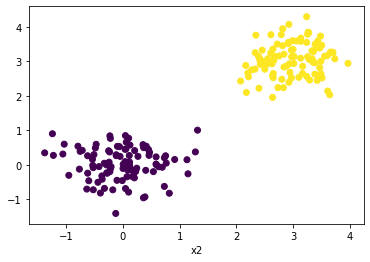

In [4]:
# Generar los datos clasificar

X,Y = make_blobs(n_samples =200, centers=[[0,0],[3,3]],cluster_std =0.5, n_features=2)

plt.scatter(X[:,0], X[:,1], c=Y)
plt.xlabel('x1')
plt.xlabel('x2')
plt.show()

In [5]:
# Función logística

def fun_log(X):
    return 1/(1+np.exp(-X))

# Funcion de regresion logistica hw(x)=g(W^T*X)

def reg_log(W,X,Y):
    hw= np.matrix(X)*np.matrix(W).transpose()
    return np.array(fun_log(hw))[:,0]

# Funcion de costo ebtropia

def fun_cost(W,X,Y):
    yhat = reg_log(W,X,Y)
    J = np.sum(-Y*np.log(yhat) - (1-Y)*np.log(1-yhat))*(1/len(Y))
    return J
    

In [6]:
# Inicializar las variables para la optimizcion

# xa =[1;x]
# W=[w0;w1;...;wn]

# Y = W^T * Xa = w0 + w1*x1 + ...+ wn*xn

Xa= np.append(np.ones((len(Y),1)), X, axis=1)

m,n = np.shape(Xa)
W = np.zeros(n)



In [8]:
# Optimizacion por medio de la libreria

res = opt.minimize (fun_cost, W, args=(Xa,Y))
W=res.x


/home/deloga/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/home/deloga/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()
/home/deloga/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/home/deloga/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/home/deloga/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()
/home/deloga/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/home/deloga/anaconda3/lib/python3.7/site-packages/i

In [9]:
# Simular la regresion logistica obtenida

Yhat = np.round(reg_log(W,Xa,Y),0)


/home/deloga/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


In [10]:
Yhat

array([1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0.])

In [11]:
# Generar todas las posibles combinaciones entre x1 y x2

x = np.arange(-3,5,0.01)
y = np.arange(-3,5,0.01)
Xm,Ym = np.meshgrid(x,y)
m,n = np.shape(Xm)
Xmr = np.reshape(Xm,(m*n,1))
Ymr = np.reshape(Ym,(m*n,1))

Xtmp = np.append(Xmr,Ymr,axis=1)
Xtmp = np.append(np.ones((len(Xmr),1)),Xtmp,axis=1)
Ytmp = np.round(reg_log(W,Xtmp,Xmr),0)

Z= np.reshape(Ytmp, (m,n))


In [12]:
Z

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

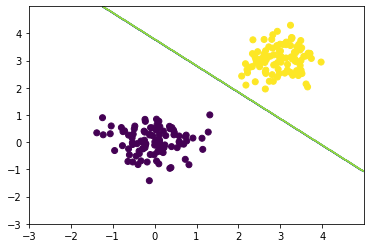

In [13]:
# Dibujar el controno

plt.contour(Xm,Ym, Z)

plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

